In [1]:
import pandas as pd
from sklearn import model_selection
import numpy as np

### Exploration of Dataset

In [2]:
df = pd.read_csv("cumulative.csv")

print('number of classes = ', len(df['action'].value_counts()))
print('names of classes  = ', df['action'].value_counts().index.values)
print('\nPercentage of each class in the dataset :\n', [i/len(df)*100 for i in df['action'].value_counts()])
print('\nEach class in the dataset :\n', df['action'].value_counts())

number of classes =  6
names of classes  =  ['walking' 'sit' 'pushups' 'fall' 'walking-with-hands-up' 'actions1']

Percentage of each class in the dataset :
 [34.43654529733884, 24.59890479392833, 17.43923527716399, 12.926313766932463, 7.383033912959938, 3.215966951676434]

Each class in the dataset :
 walking                  14338
sit                      10242
pushups                   7261
fall                      5382
walking-with-hands-up     3074
actions1                  1339
Name: action, dtype: int64


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41636 entries, 0 to 41635
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nose_x           41636 non-null  float64
 1   nose_y           41636 non-null  float64
 2   leftEye_x        41636 non-null  float64
 3   leftEye_y        41636 non-null  float64
 4   rightEye_x       41636 non-null  float64
 5   rightEye_y       41636 non-null  float64
 6   leftEar_x        41636 non-null  float64
 7   leftEar_y        41636 non-null  float64
 8   rightEar_x       41636 non-null  float64
 9   rightEar_y       41636 non-null  float64
 10  leftShoulder_x   41636 non-null  float64
 11  leftShoulder_y   41636 non-null  float64
 12  rightShoulder_x  41636 non-null  float64
 13  rightShoulder_y  41636 non-null  float64
 14  leftElbow_x      41636 non-null  float64
 15  leftElbow_y      41636 non-null  float64
 16  rightElbow_x     41636 non-null  float64
 17  rightElbow_y

##### We can see only 6 since there is clash in naming 
For example there are two videos ending with **"sit"** and the above is a result of only unique values

In [4]:
sss = model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# the for loop is for when we want to see the index of train and test from one or more splits
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [37224 16587 14732 ... 28753 31872 32950] TEST: [ 7333 34171 11400 ... 39656 22518 30990]


In [5]:
print('Percentage of each class after split :\n', [i/len(y_train)*100 for i in y_train.value_counts()])

Percentage of each class after split :
 [34.436171490332654, 24.597694247628198, 17.44025459349105, 12.927825147111804, 7.38261078419599, 3.2154437372403026]


### We can observe that the percentage of class is preserved
Moving ahead we could choose to **downsample** the data so all can match with the lowest data we have or **upsample** and create new data so as to match with the highest data sample we have

##### The below two blocks of code are to provide a base to compare DL models to ML model (Random Forest)

In [8]:
# Applying Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_features=None, n_jobs=-1, verbose=3,)
params = {'criterion' : ['gini', 'entropy'],
          'n_estimators' : [10, 100, 1000, 10000]}

model = GridSearchCV(rfc, params).fit(X_train, y_train)
print('Best estimator = ', model.best_estimator_,'\nBest score = ',model.best_score_,'\nBest Params =',model.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    2.1s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    2.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.2s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    1.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.5s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 con

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.9min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 488 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   30.3s
[Parallel(n_j

[Parallel(n_jobs=12)]: Done 1544 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 2024 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 2568 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 3176 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 3848 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 4584 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 5384 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 6248 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 7176 tasks      | elapsed:    2.6s
[Parallel(n_jobs=12)]: Done 8168 tasks      | elapsed:    3.1s
[Parallel(n_jobs=12)]: Done 9224 tasks      | elapsed:    3.7s
[Parallel(n_jobs=12)]: Done 10000 out of 10000 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 264

[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    2.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    2.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Usin

[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 8168 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 9224 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed: 31.3min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 488 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 1128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 1544 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 2024 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 2568 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 3176 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 3

[Parallel(n_jobs=12)]: Done 3176 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 3848 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 4584 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 5384 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 6248 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 7176 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 8168 tasks      | elapsed:    2.4s
[Parallel(n_jobs=12)]: Done 9224 tasks      | elapsed:    2.8s
[Parallel(n_jobs=12)]: Done 10000 out of 10000 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1128 t

building tree 1 of 1000building tree 2 of 1000

building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.7s


building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000


[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   15.5s


building tree 117 of 1000
building tree 118 of 1000
building tree 119 of 1000
building tree 120 of 1000
building tree 121 of 1000
building tree 122 of 1000
building tree 123 of 1000
building tree 124 of 1000
building tree 125 of 1000
building tree 126 of 1000
building tree 127 of 1000
building tree 128 of 1000
building tree 129 of 1000
building tree 130 of 1000
building tree 131 of 1000
building tree 132 of 1000
building tree 133 of 1000
building tree 134 of 1000
building tree 135 of 1000
building tree 136 of 1000
building tree 137 of 1000
building tree 138 of 1000
building tree 139 of 1000
building tree 140 of 1000
building tree 141 of 1000
building tree 142 of 1000
building tree 143 of 1000
building tree 144 of 1000
building tree 145 of 1000
building tree 146 of 1000
building tree 147 of 1000
building tree 148 of 1000
building tree 149 of 1000
building tree 150 of 1000
building tree 151 of 1000
building tree 152 of 1000
building tree 153 of 1000
building tree 154 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   38.6s


building tree 278 of 1000
building tree 279 of 1000
building tree 280 of 1000
building tree 281 of 1000
building tree 282 of 1000
building tree 283 of 1000
building tree 284 of 1000
building tree 285 of 1000
building tree 286 of 1000
building tree 287 of 1000
building tree 288 of 1000
building tree 289 of 1000
building tree 290 of 1000
building tree 291 of 1000
building tree 292 of 1000
building tree 293 of 1000
building tree 294 of 1000
building tree 295 of 1000
building tree 296 of 1000
building tree 297 of 1000
building tree 298 of 1000
building tree 299 of 1000
building tree 300 of 1000
building tree 301 of 1000
building tree 302 of 1000
building tree 303 of 1000
building tree 304 of 1000
building tree 305 of 1000
building tree 306 of 1000
building tree 307 of 1000
building tree 308 of 1000
building tree 309 of 1000
building tree 310 of 1000
building tree 311 of 1000
building tree 312 of 1000
building tree 313 of 1000
building tree 314 of 1000
building tree 315 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  1.2min


building tree 501 of 1000
building tree 502 of 1000
building tree 503 of 1000
building tree 504 of 1000
building tree 505 of 1000
building tree 506 of 1000
building tree 507 of 1000
building tree 508 of 1000
building tree 509 of 1000
building tree 510 of 1000
building tree 511 of 1000
building tree 512 of 1000
building tree 513 of 1000
building tree 514 of 1000
building tree 515 of 1000
building tree 516 of 1000
building tree 517 of 1000
building tree 518 of 1000
building tree 519 of 1000
building tree 520 of 1000
building tree 521 of 1000
building tree 522 of 1000
building tree 523 of 1000
building tree 524 of 1000
building tree 525 of 1000
building tree 526 of 1000
building tree 527 of 1000
building tree 528 of 1000
building tree 529 of 1000
building tree 530 of 1000
building tree 531 of 1000
building tree 532 of 1000
building tree 533 of 1000
building tree 534 of 1000
building tree 535 of 1000
building tree 536 of 1000
building tree 537 of 1000
building tree 538 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.9min


building tree 788 of 1000
building tree 789 of 1000
building tree 790 of 1000
building tree 791 of 1000
building tree 792 of 1000
building tree 793 of 1000
building tree 794 of 1000
building tree 795 of 1000
building tree 796 of 1000
building tree 797 of 1000
building tree 798 of 1000
building tree 799 of 1000
building tree 800 of 1000
building tree 801 of 1000
building tree 802 of 1000
building tree 803 of 1000
building tree 804 of 1000
building tree 805 of 1000
building tree 806 of 1000
building tree 807 of 1000
building tree 808 of 1000
building tree 809 of 1000
building tree 810 of 1000
building tree 811 of 1000
building tree 812 of 1000
building tree 813 of 1000
building tree 814 of 1000
building tree 815 of 1000
building tree 816 of 1000
building tree 817 of 1000
building tree 818 of 1000
building tree 819 of 1000
building tree 820 of 1000
building tree 821 of 1000
building tree 822 of 1000
building tree 823 of 1000
building tree 824 of 1000
building tree 825 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.4min finished


In [7]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
import pickle

filename = "RFC.pickle"
#pickle.dump(model, open(filename, "wb"))

model = pickle.load(open(filename, 'rb'))

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 488 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.2s finished


array([[ 268,    0,    0,    0,    0,    0],
       [   0, 1073,    2,    1,    0,    0],
       [   0,    2, 1450,    0,    0,    0],
       [   0,    2,    1, 2043,    3,    0],
       [   0,    0,    0,    0, 2868,    0],
       [   0,    0,    0,    0,    1,  614]], dtype=int64)

In [8]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[8060,    0],
        [   0,  268]],

       [[7248,    4],
        [   3, 1073]],

       [[6873,    3],
        [   2, 1450]],

       [[6278,    1],
        [   6, 2043]],

       [[5456,    4],
        [   0, 2868]],

       [[7713,    0],
        [   1,  614]]], dtype=int64)

# Artificial Neural Network

In [180]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder().fit(df.iloc[:, -1].values.reshape(-1,1))
df["Transformed"] = enc.transform(df.iloc[:, -1].values.reshape(-1,1))
df['Transformed'] = df['Transformed'].astype('category')

enc.classes_

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 2, 3, 4, 5], dtype=int64)

In [181]:
import tensorflow as tf
# tf.__version__ = 1.14.0

#x = tf.placeholder(dtype = tf.float32, shape = [34,1])
#y = tf.placeholder(dtype = tf.int32, shape = [None])


model = tf.keras.Sequential([tf.keras.layers.Dense(32, activation="relu", name="Dense_1", 
                                                   input_dim=df.T.iloc[:-2, 1].values.reshape(-1, 1).shape[0]),
                             tf.keras.layers.BatchNormalization(name="Batch_Norm"),
                             tf.keras.layers.Dense(32, activation="relu", name="Dense_2"),
                             tf.keras.layers.Dense(16, activation="relu", name="Dense_3"),
                             tf.keras.layers.Dense(10, activation="relu", name="Dense_4"),
                             tf.keras.layers.Dense(len(enc.classes_), activation="softmax", name="Dense_OP")])
#print(model.weights)
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 32)                1120      
_________________________________________________________________
Batch_Norm (BatchNormalizati (None, 32)                128       
_________________________________________________________________
Dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
Dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
Dense_4 (Dense)              (None, 10)                170       
_________________________________________________________________
Dense_OP (Dense)             (None, 6)                 66        
Total params: 3,068
Trainable params: 3,004
Non-trainable params: 64
___________________________________________________

In [182]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit_transform(df['action'].values.reshape(-1,1))

y_train = ohe.transform(df['action'][train_index].values.reshape(-1,1)).toarray()
y_test = ohe.transform(df['action'][test_index].values.reshape(-1,1)).toarray()

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size= 64, epochs=100, verbose=1)
model.save('ANN', save_format='h5')

Train on 33308 samples, validate on 8328 samples
Epoch 1/100
33308/33308 [==============================] - 6s 169us/sample - loss: 0.6313 - acc: 0.7840 - val_loss: 0.4296 - val_acc: 0.8534
Epoch 2/100
33308/33308 [==============================] - 5s 145us/sample - loss: 0.3201 - acc: 0.8875 - val_loss: 0.2691 - val_acc: 0.9048
Epoch 3/100
33308/33308 [==============================] - 5s 150us/sample - loss: 0.2386 - acc: 0.9138 - val_loss: 0.2399 - val_acc: 0.9139
Epoch 4/100
33308/33308 [==============================] - 5s 147us/sample - loss: 0.2047 - acc: 0.9262 - val_loss: 0.1955 - val_acc: 0.9306
Epoch 5/100
33308/33308 [==============================] - 5s 155us/sample - loss: 0.1863 - acc: 0.9334 - val_loss: 0.2414 - val_acc: 0.9132
Epoch 6/100
33308/33308 [==============================] - 5s 154us/sample - loss: 0.1724 - acc: 0.9381 - val_loss: 0.1827 - val_acc: 0.9354
Epoch 7/100
33308/33308 [==============================] - 5s 142us/sample - loss: 0.1535 - acc: 0.9453 -

33308/33308 [==============================] - 2s 55us/sample - loss: 0.0514 - acc: 0.9812 - val_loss: 0.0856 - val_acc: 0.9682
Epoch 59/100
33308/33308 [==============================] - 5s 163us/sample - loss: 0.0548 - acc: 0.9814 - val_loss: 0.0523 - val_acc: 0.9828
Epoch 60/100
33308/33308 [==============================] - 6s 170us/sample - loss: 0.0562 - acc: 0.9805 - val_loss: 0.1708 - val_acc: 0.9444
Epoch 61/100
33308/33308 [==============================] - 5s 152us/sample - loss: 0.0507 - acc: 0.9824 - val_loss: 0.0434 - val_acc: 0.9855
Epoch 62/100
33308/33308 [==============================] - 5s 149us/sample - loss: 0.0542 - acc: 0.9810 - val_loss: 0.0952 - val_acc: 0.9669
Epoch 63/100
33308/33308 [==============================] - 5s 153us/sample - loss: 0.0515 - acc: 0.9820 - val_loss: 0.1655 - val_acc: 0.9556
Epoch 64/100
33308/33308 [==============================] - 5s 155us/sample - loss: 0.0547 - acc: 0.9805 - val_loss: 0.0606 - val_acc: 0.9769
Epoch 65/100
33308/3

In [183]:
pd.DataFrame(model.predict(df.iloc[[1,40000,10000], :-2])*100, columns=ohe.categories_)

,actions1,fall,pushups,sit,walking,walking-with-hands-up
0,6.485119e-14,5.405996e-11,1.000000e+02,1.117191e-12,7.490313e-21,2.483493e-17
1,3.189082e-09,1.996307e-03,1.895961e-08,3.380385e-01,9.965996e+01,2.679894e-09
2,3.678490e-09,1.250731e-11,2.145050e-10,2.108383e-03,9.999701e+01,8.880385e-04


In [184]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

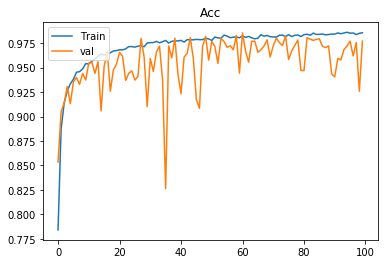

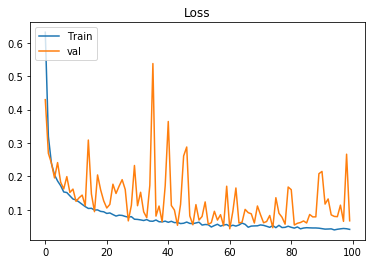

In [185]:
import matplotlib.pyplot as plt

plt.plot(history.epoch, history.history['acc'])
plt.plot(history.epoch, history.history['val_acc'])
plt.title('Acc')
plt.legend(['Train', "val"], loc='upper left')
plt.show()

plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.title('Loss')
plt.legend(['Train', "val"], loc='upper left')
plt.show()

In [186]:
model.predict_classes(df.iloc[1:2, :-2])

array([2], dtype=int64)

In [187]:
df["Transformed"] = df["Transformed"].astype('int64')

In [191]:
confusion_matrix(df['Transformed'][test_index], model.predict_classes(df.iloc[:, :-2])[test_index])

array([[ 266,    2,    0,    0,    0,    0],
       [   2,  997,   17,   54,    6,    0],
       [   2,    4, 1443,    2,    1,    0],
       [   0,    3,    1, 2007,   38,    0],
       [   0,    1,    0,   48, 2819,    0],
       [   0,    0,    0,   10,    0,  605]], dtype=int64)

# RNN

In [212]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report 
print('\nClassification Report\n')

print('\nAccuracy of Random Forest Classifier (RFC): {:.2f}\n'.format(accuracy_score(y_test, ohe.transform(y_pred.reshape(-1,1)).toarray())))    
print(classification_report(ohe.transform(y_pred.reshape(-1,1)).toarray(), y_test, target_names=ohe.categories_[0]))

print('\nAccuracy of Artificial Neural Network (ANN): {:.2f}\n'.format(accuracy_score(df['Transformed'][test_index], model.predict_classes(df.iloc[:, :-2])[test_index])))
print(classification_report(df['Transformed'][test_index], model.predict_classes(df.iloc[:, :-2])[test_index], target_names=ohe.categories_[0]))


Classification Report


Accuracy of Random Forest Classifier (RFC): 1.00

                       precision    recall  f1-score   support

             actions1       1.00      1.00      1.00       268
                 fall       1.00      1.00      1.00      1077
              pushups       1.00      1.00      1.00      1453
                  sit       1.00      1.00      1.00      2044
              walking       1.00      1.00      1.00      2872
walking-with-hands-up       1.00      1.00      1.00       614

            micro avg       1.00      1.00      1.00      8328
            macro avg       1.00      1.00      1.00      8328
         weighted avg       1.00      1.00      1.00      8328
          samples avg       1.00      1.00      1.00      8328


Accuracy of Artificial Neural Network (ANN): 0.98

                       precision    recall  f1-score   support

             actions1       0.99      0.99      0.99       268
                 fall       0.99      0.93      0.

In [220]:
df.iloc[1, :-2].values

array([258.8809064423327, 1096.1560963877098, 247.6743717696233,
       1103.16589102719, 237.49869866443905, 1111.8137990339578,
       211.85583551118512, 1091.1299527575502, 197.20654406924518,
       1082.078272799418, 240.85130642588032, 1042.566650771797,
       224.6896357542929, 1012.5111997844092, 290.9416211163948,
       1054.6050492941076, 324.71345306269507, 967.8415862775054,
       305.6517183036645, 1068.0997568885393, 379.74106977782867,
       972.2731288460247, 355.97467642055307, 1028.445288295582,
       314.87228964965647, 906.4956276720152, 445.0320768951543,
       1030.3417711458944, 406.206993282916, 952.7757588370903,
       535.5605948946843, 1017.1907375791313, 486.6165264304237,
       951.2660654441721], dtype=object)